<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats.metrics
## Quickstart Guide

### <http://compstats.readthedocs.org>


## Installing CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [1]:
try:
  import CompStats
except ImportError:
    !pip install Compstats
    # !pip install -U git+https://github.com/INGEOTEC/CompStats@develop

  Cloning https://github.com/INGEOTEC/CompStats (to revision develop) to /tmp/pip-req-build-yb73d9s4
  Running command git clone --filter=blob:none --quiet https://github.com/INGEOTEC/CompStats /tmp/pip-req-build-yb73d9s4
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/INGEOTEC/CompStats to commit 438a8055b71bba437bad7bd1ef5427b29e0ed245
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for CompStats: filename=CompStats-0.1.7-py3-none-any.whl size=41028 sha256=e70584ada7f0c49c8768febba12e978c4e122d93bf8452e2d42ea190cc5b1ece
  Stored in directory: /tmp/pip-ephem-wheel-cache-sgv6titu/wheels/4f/d2/a1/8d1d30289bd99417ea947fc1e1f4587404d4e3a043b41f0289
Successfully built CompStats


# CompStats.metrics

`CompStats.metrics` aims to facilitate performance measurement (with standard errors and confidence intervals) and statistical comparisons between algorithms on a single problem, wrapping the different scores and loss functions found on `metrics`.

To illustrate the use of `CompStats.metrics`, the following snippets show an example. The instructions load the necessary libraries, including the one to obtain the problem (e.g., digits), three different classifiers, and the last line is the score used to measure the performance and compare the algorithm.

In [2]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from CompStats.metrics import f1_score

The first step is to load the digits problem and split the dataset into training and validation sets. The second step is to estimate the parameters of a linear Support Vector Machine and predict the validation set's classes. The predictions are stored in the variable `hy`.

In [3]:
X, y = load_digits(return_X_y=True)
_ = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = _
m = LinearSVC().fit(X_train, y_train)
hy = m.predict(X_val)

Once the predictions are available, it is time to measure the algorithm's performance, as seen in the following code. It is essential to note that the API used in `metrics` is followed; the difference is that the function returns an instance with different methods that can be used to estimate different performance statistics and compare algorithms.

In [4]:
score = f1_score(y_val, hy, average='macro')
score

100%|██████████| 1/1 [00:05<00:00,  5.46s/it]


<Perf(score_func=f1_score, statistic=0.9435, se=0.0099)>

The previous code shows the macro-f1 score and, in parenthesis, its standard error. The actual performance value is stored in the `Perf.statistic` function.

In [5]:
score.statistic

0.9434834454375508

Continuing with the example, let us assume that one wants to test another classifier on the same problem, in this case, a random forest, as can be seen in the following two lines. The second line predicts the validation set and sets it to the analysis.

In [6]:
ens = RandomForestClassifier().fit(X_train, y_train)
score(ens.predict(X_val), name='Random Forest')

100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


<Perf(score_func=f1_score)>
Statistic with its standard error (se)
statistic (se)
0.9655 (0.0077) <= Random Forest
0.9435 (0.0099) <= alg-1

Let us incorporate another prediction, now with the Naive Bayes classifier, as seen below.

In [7]:
nb = GaussianNB().fit(X_train, y_train)
score(nb.predict(X_val), name='Naive Bayes')

100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


<Perf(score_func=f1_score)>
Statistic with its standard error (se)
statistic (se)
0.9655 (0.0077) <= Random Forest
0.9435 (0.0099) <= alg-1
0.8549 (0.0153) <= Naive Bayes

The final step is to compare the performance of the three classifiers, which can be done with the `Perf.difference` method, as seen next.  

In [8]:
diff = score.difference()
diff

<Difference>
difference p-values  w.r.t Random Forest
0.0000 <= Naive Bayes
0.0120 <= alg-1

The class `CompStats.Difference` has the `CompStats.Difference.plot` method that can be used to depict the difference with respectto the best.

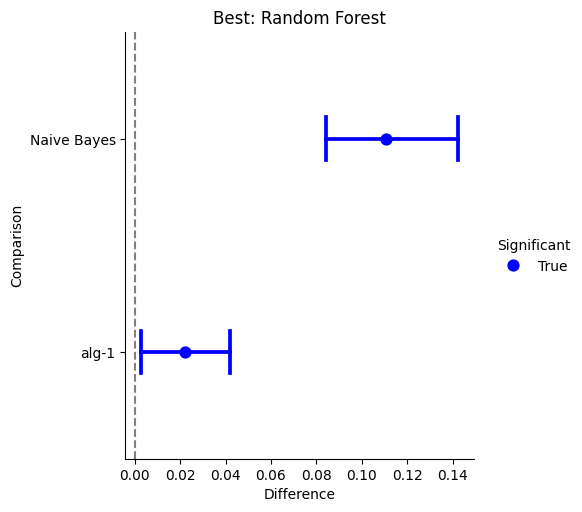

In [9]:
diff.plot()